## Thickness averaged diff tensor 

In [1]:
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt

import xgcm 
%matplotlib inline

import numpy as np
from xgcm import Grid

In [22]:
#
ds = xr.open_zarr('/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored_zarr/')
grid = Grid(ds, periodic='X')

In [23]:
ds_hat = xr.open_dataset('ds_hat_800.nc')
ds_eddy_u = xr.open_dataset('ds_twa_eddy_u_800.nc')
ds_eddy_v = xr.open_dataset('ds_twa_eddy_v_800.nc')
zeta_bar = xr.open_dataarray('zeta_bar_800.nc')

In [27]:
ds_eddy_u

<xarray.Dataset>
Dimensions:      (T: 101, XC: 400, YC: 400)
Coordinates:
    Depth        (YC, XC) float32 ...
  * XC           (XC) float32 2500.0 7500.0 12500.0 ... 1992500.0 1997500.0
  * YC           (YC) float32 2500.0 7500.0 12500.0 ... 1992500.0 1997500.0
    rA           (YC, XC) float32 ...
  * T            (T) float64 0.0 0.08 0.16 0.24 0.32 ... 7.68 7.76 7.84 7.92 8.0
Data variables:
    U_PTRACER01  (YC, XC, T) float64 ...
    U_PTRACER02  (YC, XC, T) float64 ...
    U_PTRACER03  (YC, XC, T) float64 ...
    U_PTRACER04  (YC, XC, T) float64 ...
    U_PTRACER05  (YC, XC, T) float64 ...
    U_PTRACER06  (YC, XC, T) float64 ...
    U_PTRACER07  (YC, XC, T) float64 ...
    U_PTRACER08  (YC, XC, T) float64 ...
    U_PTRACER09  (YC, XC, T) float64 ...
    U_PTRACER10  (YC, XC, T) float64 ...
    U_PTRACER11  (YC, XC, T) float64 ...
    U_PTRACER12  (YC, XC, T) float64 ...
    U_PTRACER13  (YC, XC, T) float64 ...
    U_PTRACER14  (YC, XC, T) float64 ...
    U_PTRACER15  (YC, XC, T) float64 ...
    U_PTRACER16  (YC, XC, T) float64 ...
    U_PTRACER17  (YC, XC, T) float64 ...
    U_PTRACER18  (YC, XC, T) float64 ...
    U_PTRACER19  (YC, XC, T) float64 ...
    U_PTRACER20  (YC, XC, T) float64 ...

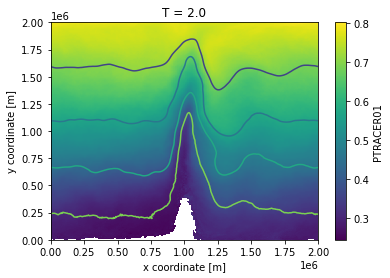

In [24]:
ds_hat.PTRACER01.sel(T=2., method='nearest').plot()
zeta_bar.sel(T=2., method='nearest').plot.contour()

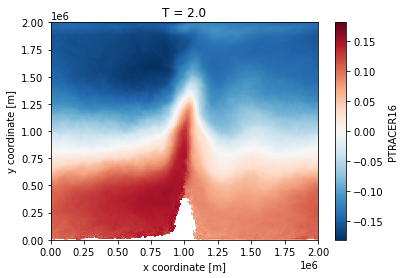

In [19]:
ds_hat.PTRACER16.sel(T=2., method='nearest').plot()

In [12]:
ds_hat

<xarray.Dataset>
Dimensions:    (T: 101, XC: 400, YC: 400)
Coordinates:
    Depth      (YC, XC) float32 ...
  * XC         (XC) float32 2500.0 7500.0 12500.0 ... 1992500.0 1997500.0
  * YC         (YC) float32 2500.0 7500.0 12500.0 ... 1992500.0 1997500.0
    rA         (YC, XC) float32 ...
  * T          (T) float64 0.0 0.08 0.16 0.24 0.32 ... 7.68 7.76 7.84 7.92 8.0
Data variables:
    PTRACER01  (YC, XC, T) float64 ...
    PTRACER02  (YC, XC, T) float64 ...
    PTRACER03  (YC, XC, T) float64 ...
    PTRACER04  (YC, XC, T) float64 ...
    PTRACER05  (YC, XC, T) float64 ...
    PTRACER06  (YC, XC, T) float64 ...
    PTRACER07  (YC, XC, T) float64 ...
    PTRACER08  (YC, XC, T) float64 ...
    PTRACER09  (YC, XC, T) float64 ...
    PTRACER10  (YC, XC, T) float64 ...
    PTRACER11  (YC, XC, T) float64 ...
    PTRACER12  (YC, XC, T) float64 ...
    PTRACER13  (YC, XC, T) float64 ...
    PTRACER14  (YC, XC, T) float64 ...
    PTRACER15  (YC, XC, T) float64 ...
    PTRACER16  (YC, XC, T) float64 ...
    PTRACER17  (YC, XC, T) float64 ...
    PTRACER18  (YC, XC, T) float64 ...
    PTRACER19  (YC, XC, T) float64 ...
    PTRACER20  (YC, XC, T) float64 ...
    U          (YC, XC, T) float64 ...
    V          (YC, XC, T) float64 ...

In [25]:
ds_hat_grads = xr.Dataset()
 
dx = 5e3

for var_name in ds_hat.keys():
    if (var_name != 'U' and var_name != 'V'):
        ds_hat_grads['d'+var_name+'dx'] = grid.interp(grid.diff(ds_hat[var_name], 'X')/dx, 'X')
        
        ds_hat_grads['d'+var_name+'dy'] = grid.interp(grid.diff(ds_hat[var_name], 'Y', boundary='extend')/dx,
                                                      'Y', boundary='extend')
        

In [33]:
# copied and modified from funcs.py
def get_flux_arrays_2D(ds_u, ds_v, list_tracers): 
    # U''C''
    testxr1 = ds_u['U_'+'PTRACER01']
    testxr1['tracer_num'] = 1

    UppCpp = testxr1 

    n=2
    for i in list_tracers[1:]: 
        temp = ds_u['U_'+i]
        temp['tracer_num'] = n 
        n=n+1

        UppCpp = xr.concat([UppCpp, temp], dim='tracer_num')

    UppCpp.name = 'UppCpp'
    
    # V''C''
    testxr1 = ds_v['V_'+'PTRACER01']
    testxr1['tracer_num'] = 1

    VppCpp = testxr1 

    n=2
    for i in list_tracers[1:]: 
        temp = ds_v['V_'+i]
        temp['tracer_num'] = n 
        n=n+1

        VppCpp = xr.concat([VppCpp, temp], dim='tracer_num')

    VppCpp.name = 'VppCpp'
    
    return [UppCpp, VppCpp]

In [34]:
list_tracers = ['PTRACER01', 'PTRACER02', 'PTRACER03', 'PTRACER04', 'PTRACER05',
               'PTRACER06', 'PTRACER07', 'PTRACER08', 'PTRACER09', 'PTRACER10',
               'PTRACER11', 'PTRACER12', 'PTRACER13', 'PTRACER14', 'PTRACER15',
               'PTRACER16', 'PTRACER17', 'PTRACER18', 'PTRACER19', 'PTRACER20']

In [51]:
[UppCpp, VppCpp] = get_flux_arrays_2D(ds_eddy_u, ds_eddy_v, list_tracers)

In [38]:
def get_grad_arrays_2D(ds, list_tracers): 
    # Put tracer gradients into xarrays
    
    # dCdx
    testxr1 = ds['dPTRACER01dx']
    testxr1['tracer_num'] = 1

    dCdx = testxr1 

    n=2
    for i in list_tracers[1:]: 
        temp = ds['d'+i+'dx']
        temp['tracer_num'] = n 
        n=n+1

        dCdx = xr.concat([dCdx, temp], dim='tracer_num')   
    dCdx.name = 'dCdx'
    
    # dCdy
    testxr1 = ds['dPTRACER01dy']
    testxr1['tracer_num'] = 1

    dCdy = testxr1 

    n=2
    for i in list_tracers[1:]: 
        temp = ds['d'+i+'dy']
        temp['tracer_num'] = n 
        n=n+1

        dCdy = xr.concat([dCdy, temp], dim='tracer_num')
    dCdy.name = 'dCdy'
    
    return [dCdx, dCdy]

In [40]:
[dCdx, dCdy]= get_grad_arrays_2D(ds_hat_grads, list_tracers)

In [52]:
# coarsen fields 

UppCpp_coarse = UppCpp.coarsen(XC=10, YC=10).mean()
VppCpp_coarse = VppCpp.coarsen(XC=10, YC=10).mean()
dCdx_coarse = dCdx.coarsen(XC=10, YC=10).mean()
dCdy_coarse = dCdy.coarsen(XC=10, YC=10).mean()

In [45]:
from scipy.linalg import pinv, eig, eigh
def calc_tensor_2D(uc,vc, cx,cy):
    Aflux = np.array([uc, vc])
    Agrad = np.array([cx, cy])

    if ~(np.isnan(Agrad).any() | np.isnan(Aflux).any()):
        return -(Aflux.dot(pinv(Agrad)))
    else:
        return np.nan*(Aflux.dot(Agrad.T))  

In [53]:
%%time
Ktensor_fast = xr.apply_ufunc(calc_tensor_2D, 
                       UppCpp_coarse.sel(tracer_num=slice(1,19,2)),
                       VppCpp_coarse.sel(tracer_num=slice(1,19,2)),
                       dCdx_coarse.sel(tracer_num=slice(1,19,2)),
                       dCdy_coarse.sel(tracer_num=slice(1,19,2)),
                       input_core_dims=[['tracer_num'], ['tracer_num'], ['tracer_num'], ['tracer_num']],
                       vectorize=True, output_core_dims=[['i','j']], dask='parallelized', 
                       output_dtypes=['float32'], output_sizes={'i':2,'j':2})
Ktensor_fast.load();

/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.


CPU times: user 14.1 s, sys: 92.8 ms, total: 14.2 s
Wall time: 14.2 s


<xarray.DataArray (YC: 40, XC: 40, T: 101, i: 2, j: 2)>
array([[[[[ 1.37635315e+03,  5.24337097e+02],
          [-1.95205475e+02, -1.23242081e+02]],

         [[ 1.79754956e+03,  5.40568298e+02],
          [-3.91119690e+02, -1.15118225e+02]],

         [[ 1.62559583e+03, -1.10842871e+03],
          [ 3.20557770e+02,  7.74163132e+01]],

         ...,

         [[            nan,             nan],
          [            nan,             nan]],

         [[            nan,             nan],
          [            nan,             nan]],

         [[            nan,             nan],
          [            nan,             nan]]],

...

        [[[ 6.53906689e+03,  5.24078186e+02],
          [ 1.72201141e+02,  2.62735016e+02]],

         [[ 6.85649170e+03,  5.09479431e+02],
          [ 9.38944931e+01,  2.41696686e+02]],

         [[ 7.23608838e+03,  4.83792191e+01],
          [ 1.98243088e+02,  2.14776688e+02]],

         ...,

         [[ 7.97267529e+03,  2.57471985e+02],
          [ 5.91349077e+00,  2.15487289e+01]],

         [[            nan,             nan],
          [            nan,             nan]],

         [[            nan,             nan],
          [            nan,             nan]]]]], dtype=float32)
Coordinates:
    Depth    (YC, XC) float32 2686.5 2686.5 2686.5 ... 2985.0 2985.0 2985.0
  * XC       (XC) float32 25000.0 75000.0 125000.0 ... 1925000.0 1975000.0
  * YC       (YC) float32 25000.0 75000.0 125000.0 ... 1925000.0 1975000.0
    rA       (YC, XC) float32 24999998.0 24999998.0 ... 24999998.0 24999998.0
  * T        (T) float64 0.0 0.08 0.16 0.24 0.32 0.4 ... 7.68 7.76 7.84 7.92 8.0
Dimensions without coordinates: i, j

In [56]:
%%time
Ktensor_slow = xr.apply_ufunc(calc_tensor_2D, 
                       UppCpp_coarse.sel(tracer_num=slice(2,20,2)),
                       VppCpp_coarse.sel(tracer_num=slice(2,20,2)),
                       dCdx_coarse.sel(tracer_num=slice(2,20,2)),
                       dCdy_coarse.sel(tracer_num=slice(2,20,2)),
                       input_core_dims=[['tracer_num'], ['tracer_num'], ['tracer_num'], ['tracer_num']],
                       vectorize=True, output_core_dims=[['i','j']], dask='parallelized', 
                       output_dtypes=['float32'], output_sizes={'i':2,'j':2})

Ktensor_slow.load();

/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.


CPU times: user 14.1 s, sys: 46.3 ms, total: 14.2 s
Wall time: 14.2 s


<xarray.DataArray (YC: 40, XC: 40, T: 101, i: 2, j: 2)>
array([[[[[ 7.26821167e+02,  2.05221985e+02],
          [ 1.54393320e+01, -5.24006538e+01]],

         [[ 1.49782874e+03,  3.54733704e+02],
          [-2.74265747e+02, -6.54174652e+01]],

         [[ 2.12980127e+03, -1.06041162e+03],
          [ 4.92845612e+02,  7.62984390e+01]],

         ...,

         [[            nan,             nan],
          [            nan,             nan]],

         [[            nan,             nan],
          [            nan,             nan]],

         [[            nan,             nan],
          [            nan,             nan]]],

...

        [[[ 7.55961426e+03,  3.26748749e+02],
          [ 2.03047195e+02,  2.75794617e+02]],

         [[ 7.89198389e+03,  3.62096893e+02],
          [ 1.31139008e+02,  2.60051300e+02]],

         [[ 8.30317383e+03,  4.46282005e+01],
          [ 3.24706146e+02,  2.13842392e+02]],

         ...,

         [[ 7.49862988e+03,  9.31450176e+00],
          [ 6.16700029e+00,  2.32304192e+01]],

         [[            nan,             nan],
          [            nan,             nan]],

         [[            nan,             nan],
          [            nan,             nan]]]]], dtype=float32)
Coordinates:
    Depth    (YC, XC) float32 2686.5 2686.5 2686.5 ... 2985.0 2985.0 2985.0
  * XC       (XC) float32 25000.0 75000.0 125000.0 ... 1925000.0 1975000.0
  * YC       (YC) float32 25000.0 75000.0 125000.0 ... 1925000.0 1975000.0
    rA       (YC, XC) float32 24999998.0 24999998.0 ... 24999998.0 24999998.0
  * T        (T) float64 0.0 0.08 0.16 0.24 0.32 0.4 ... 7.68 7.76 7.84 7.92 8.0
Dimensions without coordinates: i, j

In [57]:
lam1 = 1/31104000.
lam2 = 1/186624000.

Ktensor_corr = (lam2*Ktensor_fast - lam1*Ktensor_slow)/(lam2 - lam1)
Ktensor_corr

<xarray.DataArray (YC: 40, XC: 40, T: 101, i: 2, j: 2)>
array([[[[[ 5.96914673e+02,  1.41398956e+02],
          [ 5.75682907e+01, -3.82323647e+01]],

         [[ 1.43788452e+03,  3.17566772e+02],
          [-2.50894928e+02, -5.54773140e+01]],

         [[ 2.23064209e+03, -1.05080811e+03],
          [ 5.27303162e+02,  7.60748596e+01]],

         ...,

         [[            nan,             nan],
          [            nan,             nan]],

         [[            nan,             nan],
          [            nan,             nan]],

         [[            nan,             nan],
          [            nan,             nan]]],

...

        [[[ 7.76372363e+03,  2.87282837e+02],
          [ 2.09216400e+02,  2.78406525e+02]],

         [[ 8.09908154e+03,  3.32620361e+02],
          [ 1.38587906e+02,  2.63722229e+02]],

         [[ 8.51659082e+03,  4.38779945e+01],
          [ 3.49998779e+02,  2.13655518e+02]],

         ...,

         [[ 7.40382031e+03, -4.03169937e+01],
          [ 6.21770191e+00,  2.35667553e+01]],

         [[            nan,             nan],
          [            nan,             nan]],

         [[            nan,             nan],
          [            nan,             nan]]]]], dtype=float32)
Coordinates:
    Depth    (YC, XC) float32 2686.5 2686.5 2686.5 ... 2985.0 2985.0 2985.0
  * XC       (XC) float32 25000.0 75000.0 125000.0 ... 1925000.0 1975000.0
  * YC       (YC) float32 25000.0 75000.0 125000.0 ... 1925000.0 1975000.0
    rA       (YC, XC) float32 24999998.0 24999998.0 ... 24999998.0 24999998.0
  * T        (T) float64 0.0 0.08 0.16 0.24 0.32 0.4 ... 7.68 7.76 7.84 7.92 8.0
Dimensions without coordinates: i, j

In [58]:
Ktensor_corrT = Ktensor_corr.transpose('YC','XC','T','j','i')

STcorr = 0.5*(Ktensor_corr.data + Ktensor_corrT.data)
ATcorr = 0.5*(Ktensor_corr.data - Ktensor_corrT.data)

STcorr= xr.DataArray(STcorr, coords=Ktensor_corr.coords, dims=Ktensor_corr.dims)
ATcorr = xr.DataArray(ATcorr, coords=Ktensor_corr.coords, dims=Ktensor_corr.dims)

In [71]:
from numpy.linalg import eigh

In [73]:
# make sure the eigen values are arranged by magnitude (instead of the default arrangement)
def eigen(A):
 #   if ~np.isnan(A[0,0]):
    eigenValues, eigenVectors = eigh(A)
    idx = np.argsort(np.abs(eigenValues))
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]

        
    return (eigenValues, eigenVectors)

In [74]:
# calculate the eigenvalues and eigenvectors of symmetric part
eigvalsSTcorr, eigvecsSTcorr = xr.apply_ufunc(eigen, STcorr, input_core_dims=[['i','j']],
                                    vectorize=True, output_core_dims=[['ii'], ['k','ii']])

In [75]:
eigvalsSTcorr

<xarray.DataArray (YC: 40, XC: 40, T: 101, ii: 2)>
array([[[[-5.3449970e+01,  6.1213226e+02],
         [-5.6221092e+01,  1.4386283e+03],
         [ 4.4731239e+01,  2.2619856e+03],
         ...,
         [           nan,            nan],
         [           nan,            nan],
         [           nan,            nan]],

        [[-1.3419516e+02,  2.0109385e+03],
         [-6.1977211e+01,  3.6406758e+03],
         [ 1.1778495e+02,  1.1598894e+04],
         ...,
         [           nan,            nan],
         [           nan,            nan],
         [           nan,            nan]],

        [[-3.9992514e+00,  5.6616705e+02],
         [ 1.0193250e+02, -1.5956470e+03],
         [ 1.0398409e+02,  5.9470229e+03],
         ...,
...
         ...,
         [-2.0267644e+00,  2.2441350e+03],
         [           nan,            nan],
         [           nan,            nan]],

        [[ 2.2599701e+02,  7.3315605e+03],
         [ 2.3208031e+02,  8.1751118e+03],
         [ 2.2229172e+02,  9.3953496e+03],
         ...,
         [-8.9040451e+00,  7.4935254e+03],
         [           nan,            nan],
         [           nan,            nan]],

        [[ 2.7018240e+02,  7.7719478e+03],
         [ 2.5664417e+02,  8.1061597e+03],
         [ 2.0898694e+02,  8.5212598e+03],
         ...,
         [ 2.3527369e+01,  7.4038599e+03],
         [           nan,            nan],
         [           nan,            nan]]]], dtype=float32)
Coordinates:
    Depth    (YC, XC) float32 2686.5 2686.5 2686.5 ... 2985.0 2985.0 2985.0
  * XC       (XC) float32 25000.0 75000.0 125000.0 ... 1925000.0 1975000.0
  * YC       (YC) float32 25000.0 75000.0 125000.0 ... 1925000.0 1975000.0
    rA       (YC, XC) float32 24999998.0 24999998.0 ... 24999998.0 24999998.0
  * T        (T) float64 0.0 0.08 0.16 0.24 0.32 0.4 ... 7.68 7.76 7.84 7.92 8.0
Dimensions without coordinates: ii

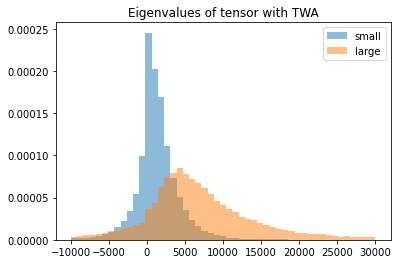

In [83]:
eigvalsSTcorr.isel(ii=0).plot.hist(bins=np.linspace(-1e4, 3e4, 50), alpha=0.5, density=True, label='small');
eigvalsSTcorr.isel(ii=1).plot.hist(bins=np.linspace(-1e4, 3e4, 50), alpha=0.5, density=True, label='large');
plt.title('Eigenvalues of tensor with TWA')
plt.legend()

In [96]:
zeta_bar_coarse = zeta_bar.coarsen(XC=10, YC=10).mean()

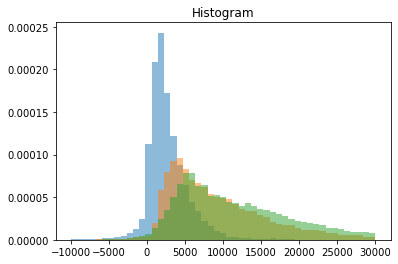

In [109]:
eigvalsSTcorr.isel(ii=0).where(zeta_bar_coarse<-300.).sel(YC=slice(500e3, 1500e3)).plot.hist(bins=np.linspace(-1e4, 3e4, 50), alpha=0.5, density=True, label='small');
eigvalsSTcorr.isel(ii=1).where(zeta_bar_coarse<-300.).sel(YC=slice(500e3, 1500e3)).plot.hist(bins=np.linspace(-1e4, 3e4, 50), alpha=0.5, density=True, label='small');
(eigvalsSTcorr.isel(ii=0) + eigvalsSTcorr.isel(ii=1)).where(zeta_bar_coarse<-300.).sel(YC=slice(500e3, 1500e3)).plot.hist(bins=np.linspace(-1e4, 3e4, 50), alpha=0.5, density=True, label='small');

In [105]:
diff_tensor = xr.Dataset()
diff_tensor['Kfast'] = Ktensor_fast
diff_tensor['Kslow'] = Ktensor_slow
diff_tensor['Kcorr'] = Ktensor_corr
diff_tensor['STcorr'] = STcorr
diff_tensor['ATcorr'] = ATcorr
diff_tensor['eigvalsSTcorr'] = np.real(eigvalsSTcorr)
diff_tensor['eigvecsSTcorr'] = eigvecsSTcorr


In [106]:
diff_tensor.to_netcdf('diff_tensor_TWA_50km_av800.nc')

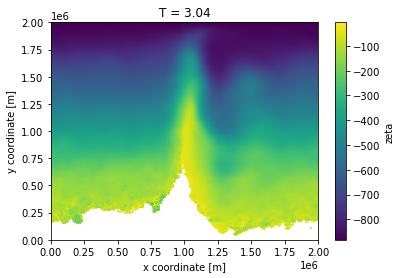

In [87]:
zeta_bar.sel(T=3, method='nearest').plot()

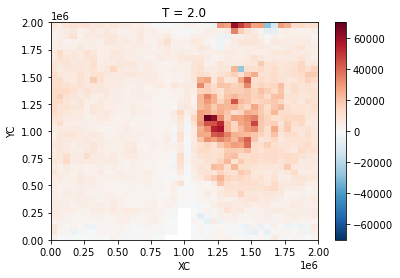

In [102]:
eigvalsSTcorr.isel(ii=1).sel(T=2, method='nearest').plot()

(array([  159.,   209.,   253.,   319.,   403.,   614.,   779.,   971.,
         1413.,  2073.,  3221.,  5404., 15086., 14065., 15135., 12283.,
         8864.,  6637.,  5198.,  4118.,  3099.,  2409.,  1774.,  1444.,
         1214.,  1035.,   885.,   749.,   694.,   597.,   468.,   426.,
          405.,   359.,   308.,   243.,   215.,   189.,   172.,   138.,
          144.,   132.,   132.,   101.,   111.,   123.,   111.,   111.,
          110.]),
 array([-10000.        ,  -9183.67346939,  -8367.34693878,  -7551.02040816,
         -6734.69387755,  -5918.36734694,  -5102.04081633,  -4285.71428571,
         -3469.3877551 ,  -2653.06122449,  -1836.73469388,  -1020.40816327,
          -204.08163265,    612.24489796,   1428.57142857,   2244.89795918,
          3061.2244898 ,   3877.55102041,   4693.87755102,   5510.20408163,
          6326.53061224,   7142.85714286,   7959.18367347,   8775.51020408,
          9591.83673469,  10408.16326531,  11224.48979592,  12040.81632653,
         12857.142

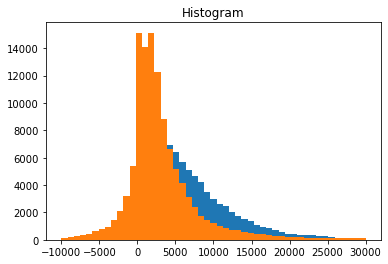

In [63]:
STcorr.isel(i=0, j=0).plot.hist(bins=np.linspace(-1e4, 3e4, 50))
STcorr.isel(i=1, j=1).plot.hist(bins=np.linspace(-1e4, 3e4, 50))